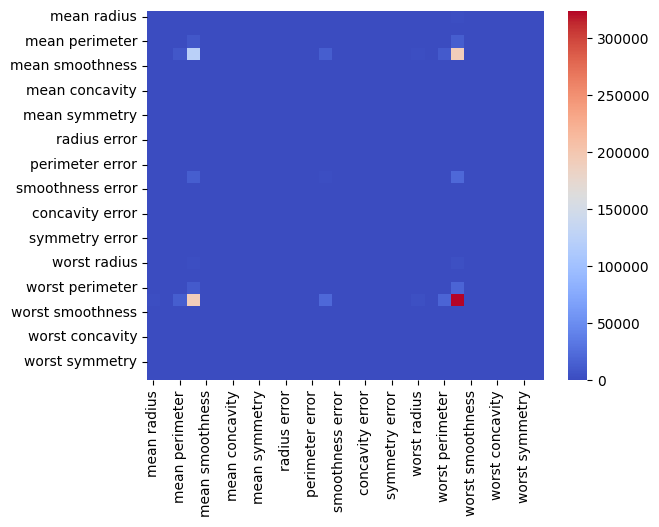

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()
cov_matrix = df.cov()
sns.heatmap(cov_matrix, cmap='coolwarm')
plt.show()

step 3

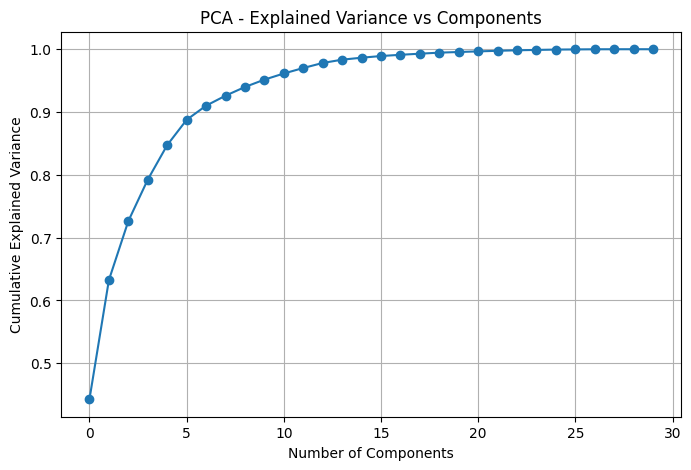

In [4]:
import pandas as pd
from sklearn.decomposition import PCA, TruncatedSVD, FastICA
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import numpy as np

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

X = data.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA().fit(X_scaled)
cum_var = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cum_var >= 0.95) + 1
pca_final = PCA(n_components=n_components)
X_pca = pca_final.fit_transform(X_scaled)
svd = TruncatedSVD(n_components=n_components)
X_svd = svd.fit_transform(X_scaled)
ica = FastICA(n_components=n_components, random_state=42, max_iter=1000)
X_ica = ica.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=[f"PCA_{i+1}" for i in range(n_components)])
df_svd = pd.DataFrame(X_svd, columns=[f"SVD_{i+1}" for i in range(n_components)])
df_ica = pd.DataFrame(X_ica, columns=[f"ICA_{i+1}" for i in range(n_components)])
df_pca.head()
df_svd.head()
df_ica.head()

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance vs Components')
plt.grid(True)
plt.show()

step 4

In [5]:
import pandas as pd
from sklearn.decomposition import PCA, TruncatedSVD, FastICA
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression , RFE
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

X = data.data
target = data.target

selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, target)
selected_feature_indices = selector.get_support(indices=True)
df_selected_best = pd.DataFrame(X_selected, columns=selected_feature_indices)
df_selected_best.head()

selector = RFE(estimator=LogisticRegression(max_iter=5000, solver='liblinear'), n_features_to_select=10)
X_selected = selector.fit_transform(X, target)
selected_feature_indices = selector.get_support(indices=True)
df_selected_rfe = pd.DataFrame(X_selected, columns=selected_feature_indices)
df_selected_rfe.head()


,0,6,7,8,20,24,26,27,28,29
0,17.99,0.3001,0.14710,0.2419,25.38,0.1622,0.7119,0.2654,0.4601,0.11890
1,20.57,0.0869,0.07017,0.1812,24.99,0.1238,0.2416,0.1860,0.2750,0.08902
2,19.69,0.1974,0.12790,0.2069,23.57,0.1444,0.4504,0.2430,0.3613,0.08758
3,11.42,0.2414,0.10520,0.2597,14.91,0.2098,0.6869,0.2575,0.6638,0.17300
4,20.29,0.1980,0.10430,0.1809,22.54,0.1374,0.4000,0.1625,0.2364,0.07678


step 5-1-1

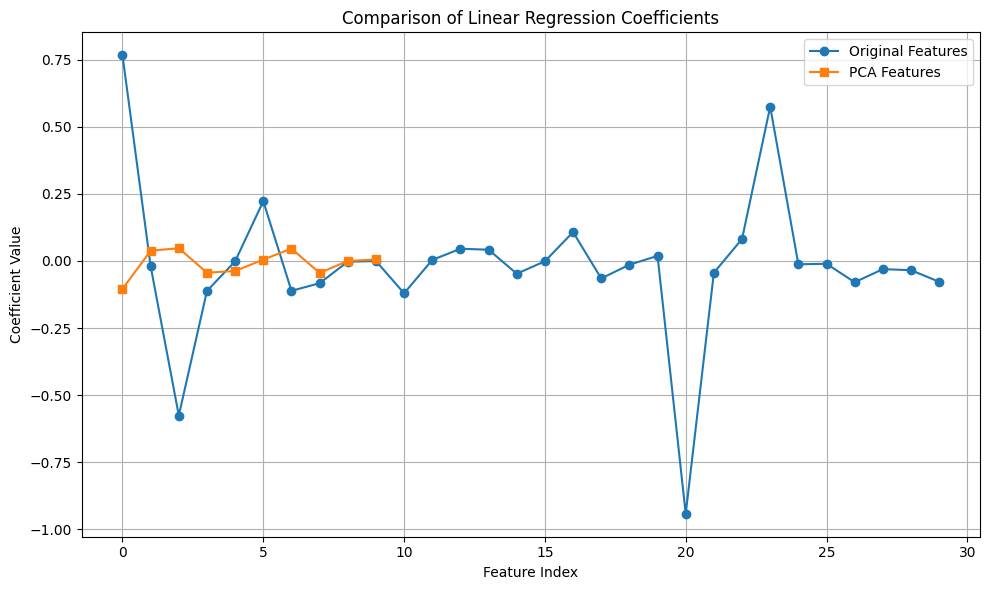

In [6]:
import pandas as pd
from sklearn.decomposition import PCA, TruncatedSVD, FastICA
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LinearRegression

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

X = data.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA().fit(X_scaled)
cum_var = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cum_var >= 0.95) + 1
pca_final = PCA(n_components=n_components)
X_pca = pca_final.fit_transform(X_scaled)
svd = TruncatedSVD(n_components=n_components)
X_svd = svd.fit_transform(X_scaled)
ica = FastICA(n_components=n_components, random_state=42, max_iter=1000)
X_ica = ica.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=[f"PCA_{i+1}" for i in range(n_components)])
df_svd = pd.DataFrame(X_svd, columns=[f"SVD_{i+1}" for i in range(n_components)])
df_ica = pd.DataFrame(X_ica, columns=[f"ICA_{i+1}" for i in range(n_components)])
df_pca.head()
df_svd.head()
df_ica.head()

Leaner_model_orig = LinearRegression()
Leaner_model_orig.fit(X_scaled, target)
coef_orig = Leaner_model_orig.coef_

Leaner_model_pca = LinearRegression()
Leaner_model_pca.fit(df_pca, target)
coef_pca = Leaner_model_pca.coef_

plt.figure(figsize=(10, 6))
plt.plot(coef_orig, 'o-', label='Original Features')
plt.plot(coef_pca, 's-', label='PCA Features')
plt.title('Comparison of Linear Regression Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

step 5-1-2

SGD (Original Data) → Iterations: 10, MSE: 0.058934
SGD (PCA Data)      → Iterations: 10, MSE: 0.066977


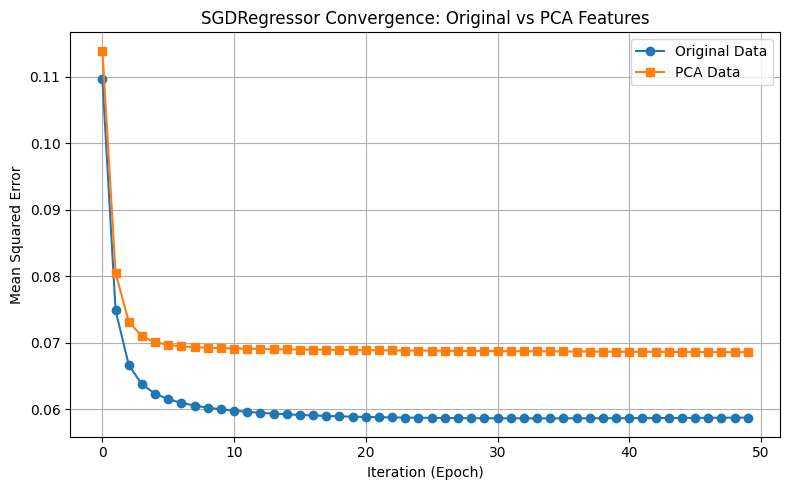

In [8]:
import pandas as pd
from sklearn.decomposition import PCA, TruncatedSVD, FastICA
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

X = data.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA().fit(X_scaled)
cum_var = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cum_var >= 0.95) + 1
pca_final = PCA(n_components=n_components)
X_pca = pca_final.fit_transform(X_scaled)
svd = TruncatedSVD(n_components=n_components)
X_svd = svd.fit_transform(X_scaled)
ica = FastICA(n_components=n_components, random_state=42, max_iter=1000)
X_ica = ica.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=[f"PCA_{i+1}" for i in range(n_components)])
df_pca.head()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, target, test_size=0.2, random_state=42)

sgd_orig = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_orig.fit(X_train, y_train)
sgd_pca = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_pca.fit(X_pca_train, y_pca_train)

y_pred_orig = sgd_orig.predict(X_test)
y_pred_pca = sgd_pca.predict(X_pca_test)
mse_orig = mean_squared_error(y_test, y_pred_orig)
mse_pca = mean_squared_error(y_pca_test, y_pred_pca)

iter_orig = sgd_orig.n_iter_
iter_pca = sgd_pca.n_iter_

print(f"SGD (Original Data) → Iterations: {iter_orig}, MSE: {mse_orig:.6f}")
print(f"SGD (PCA Data)      → Iterations: {iter_pca}, MSE: {mse_pca:.6f}")

def train_sgd_epochwise(X_train, y_train, X_test, y_test, n_epochs=50):
    sgd = SGDRegressor(max_iter=1, tol=None, random_state=42, learning_rate='invscaling', eta0=0.01)
    errors = []
    for epoch in range(n_epochs):
        sgd.partial_fit(X_train, y_train)
        y_pred = sgd.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        errors.append(mse)
    return errors

errors_orig = train_sgd_epochwise(X_train, y_train, X_test, y_test)
errors_pca = train_sgd_epochwise(X_pca_train, y_pca_train, X_pca_test, y_pca_test)

plt.figure(figsize=(8, 5))
plt.plot(errors_orig, label='Original Data', marker='o')
plt.plot(errors_pca, label='PCA Data', marker='s')
plt.xlabel('Iteration (Epoch)')
plt.ylabel('Mean Squared Error')
plt.title('SGDRegressor Convergence: Original vs PCA Features')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


step 5-2-1

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA, TruncatedSVD, FastICA
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

X = data.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA().fit(X_scaled)
cum_var = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cum_var >= 0.95) + 1
pca_final = PCA(n_components=n_components)
X_pca = pca_final.fit_transform(X_scaled)
svd = TruncatedSVD(n_components=n_components)
X_svd = svd.fit_transform(X_scaled)
ica = FastICA(n_components=n_components, random_state=42, max_iter=1000)
X_ica = ica.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=[f"PCA_{i+1}" for i in range(n_components)])
df_pca.head()

results = {}
for n_clusters in range(2, 5):
    km_orig = KMeans(n_clusters=n_clusters ,random_state=42, n_init=10)
    labels_orig = km_orig.fit_predict(X_scaled)
    sil_orig = silhouette_score(X_scaled, labels_orig)
    inertia_orig = km_orig.inertia_
    iter_orig = km_orig.n_iter_

    km_pca = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels_pca = km_pca.fit_predict(X_pca)
    sil_pca = silhouette_score(X_pca, labels_pca)
    inertia_pca = km_pca.inertia_
    iter_pca = km_pca.n_iter_

    results[n_clusters] = { "original" : {"sil": sil_orig, "inertia": inertia_orig, "iter": iter_orig}, "pca": { "sil": sil_pca, "inertia": inertia_pca, "iter": iter_pca}}

for n_clusters, metrics in results.items():
    print(f"Number of Clusters: {n_clusters}")
    print("Original Data:")
    print(f"  - Silhouette Score: {metrics['original']['sil']}")
    print(f"  - Inertia: {metrics['original']['inertia']}")
    print(f"  - Iterations: {metrics['original']['iter']}")
    print("PCA Data:")
    print(f"  - Silhouette Score: {metrics['pca']['sil']}")
    print(f"  - Inertia: {metrics['pca']['inertia']}")
    print(f"  - Iterations: {metrics['pca']['iter']}")
    print()



Number of Clusters: 2
Original Data:
  - Silhouette Score: 0.34338224069077816
  - Inertia: 11595.526607115773
  - Iterations: 7
PCA Data:
  - Silhouette Score: 0.357986421698432
  - Inertia: 10770.289989350724
  - Iterations: 8

Number of Clusters: 3
Original Data:
  - Silhouette Score: 0.3143840098608098
  - Inertia: 10061.797818243693
  - Iterations: 11
PCA Data:
  - Silhouette Score: 0.3264758823850368
  - Inertia: 9239.09957205107
  - Iterations: 11

Number of Clusters: 4
Original Data:
  - Silhouette Score: 0.28330544840954164
  - Inertia: 9258.989105136367
  - Iterations: 33
PCA Data:
  - Silhouette Score: 0.2861345643516214
  - Inertia: 8450.055156509985
  - Iterations: 17



step 5-3-1

In [11]:
import pandas as pd
from sklearn.decomposition import PCA, TruncatedSVD, FastICA
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

X = data.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
target = data.target

pca = PCA().fit(X_scaled)
cum_var = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cum_var >= 0.95) + 1
pca_final = PCA(n_components=n_components)
X_pca = pca_final.fit_transform(X_scaled)
svd = TruncatedSVD(n_components=n_components)
X_svd = svd.fit_transform(X_scaled)
ica = FastICA(n_components=n_components, random_state=42, max_iter=1000)
X_ica = ica.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, target, test_size=0.2, random_state=42)

knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train, y_train)
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca_train, y_pca_train)

start_time = time.time()
y_pred_orig = knn_orig.predict(X_test)
time_orig = time.time() - start_time
start_time = time.time()
y_pred_pca = knn_pca.predict(X_pca_test)
time_pca = time.time() - start_time

accuracy_orig = accuracy_score(y_test, y_pred_orig)
accuracy_pca = accuracy_score(y_pca_test, y_pred_pca)

print(f"KNN on Original Data → Accuracy: {accuracy_orig:.4f}, Predict Time: {time_orig*1000:.3f} ms")
print(f"KNN on PCA Data      → Accuracy: {accuracy_pca:.4f}, Predict Time: {time_pca*1000:.3f} ms")



KNN on Original Data → Accuracy: 0.9474, Predict Time: 2.552 ms
KNN on PCA Data      → Accuracy: 0.9561, Predict Time: 4.376 ms


step 5-3-2

RandomForest Accuracy (Original Data):  0.9649
RandomForest Accuracy (PCA Data):       0.9474
RandomForest Accuracy (SelectKBest):    0.9561


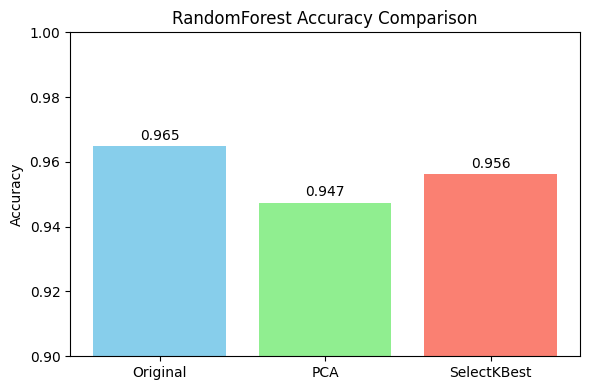

In [15]:
import pandas as pd
from sklearn.decomposition import PCA, TruncatedSVD, FastICA
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

X = data.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
target = data.target

pca = PCA().fit(X_scaled)
cum_var = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cum_var >= 0.95) + 1
pca_final = PCA(n_components=n_components)
X_pca = pca_final.fit_transform(X_scaled)
svd = TruncatedSVD(n_components=n_components)
X_svd = svd.fit_transform(X_scaled)
ica = FastICA(n_components=n_components, random_state=42, max_iter=1000)
X_ica = ica.fit_transform(X_scaled)

selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, target)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, target, test_size=0.2, random_state=42)
X_kbest_train, X_kbest_test, y_kbest_train, y_kbest_test = train_test_split(X_selected, target, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=200, random_state=42)

rf.fit(X_train, y_train)
y_pred_orig = rf.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred_orig)

rf.fit(X_pca_train, y_pca_train)
y_pred_pca = rf.predict(X_pca_test)
acc_pca = accuracy_score(y_pca_test, y_pred_pca)

rf.fit(X_kbest_train, y_kbest_train)
y_pred_kbest = rf.predict(X_kbest_test)
acc_kbest = accuracy_score(y_kbest_test, y_pred_kbest)

print(f"RandomForest Accuracy (Original Data):  {acc_orig:.4f}")
print(f"RandomForest Accuracy (PCA Data):       {acc_pca:.4f}")
print(f"RandomForest Accuracy (SelectKBest):    {acc_kbest:.4f}")

# Visualization
labels = ['Original', 'PCA', 'SelectKBest']
accs = [acc_orig, acc_pca, acc_kbest]

plt.figure(figsize=(6,4))
plt.bar(labels, accs, color=['skyblue','lightgreen','salmon'])
plt.ylabel('Accuracy')
plt.title('RandomForest Accuracy Comparison')
plt.ylim(0.9, 1.0)
for i, v in enumerate(accs):
    plt.text(i, v+0.002, f"{v:.3f}", ha='center', fontsize=10)
plt.tight_layout()
plt.show()

